In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat, savemat

In [2]:
filepath = './BB_CVSANS/'
filename_mat = ['S{:d}.mat'.format(i) for i in [1,3,5]]

In [3]:
def sample_potential(parameters,r,ur_hc,d_HS):
    n_sample = 100
    kappa = parameters[1][0][0]
    kappa_std = parameters[1][1][0]
    lnA = parameters[2][0][0]
    lnA_std = parameters[2][1][0]
    
    ur_sample = np.zeros((len(r),n_sample))
    for i in range(n_sample):
        kappa_sample = np.random.normal()*(kappa_std) + kappa
        lnA_sample = np.random.normal()*(lnA_std) + lnA
        ur_sample[:,i] = np.exp(lnA_sample)*np.exp(-(r-d_HS)/(kappa_sample*d_HS))/(r/d_HS) + ur_hc
        
    return ur_sample

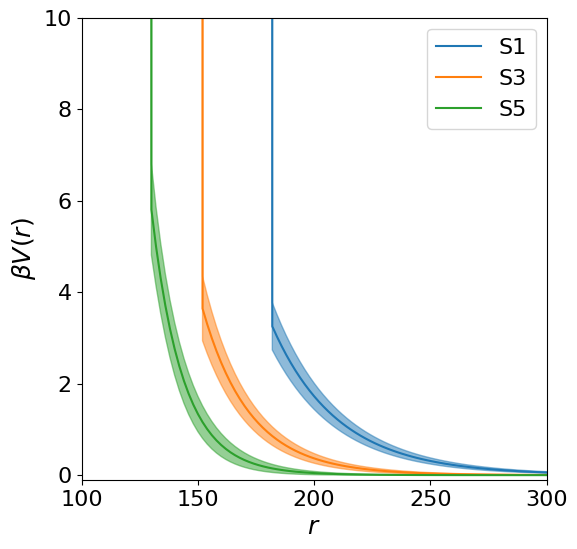

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
c_cycle = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
           'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

r = np.linspace(100, 300, 101)

for i in range(3):
    loaded_data = loadmat(filepath+filename_mat[i])
    parameters = loaded_data['parameters']
    
    d_HS = loaded_data['d_HS'][0]*loaded_data['fp'][0,10]

    ur_hc = 4*500*((2**(1/6)*d_HS/r)**12-(2**(1/6)*d_HS/r)**6-0.25)
    ur_hc[r>=d_HS] = 0
    ur_predict =  np.exp(parameters[2][0][0])*np.exp(-(r-d_HS)/(parameters[1][0][0]*d_HS))/(r/d_HS) + ur_hc
    ur_sample = sample_potential(parameters,r,ur_hc,d_HS)
    ur_std = np.std(ur_sample,axis=1)
    ur_mean = np.mean(ur_sample,axis=1)
    
    ax.fill_between(r,ur_mean+ur_std,ur_mean-ur_std,color=c_cycle[i],alpha=0.5)
    ax.plot(r,ur_mean,color=c_cycle[i],label=filename_mat[i].replace(".mat", ""))

ax.set_ylim(-0.1,10)
ax.set_xlim(100,300)
ax.set_xlabel('$r$',fontsize=18)
ax.set_ylabel(r'$\beta V(r)$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=16)
plt.show()

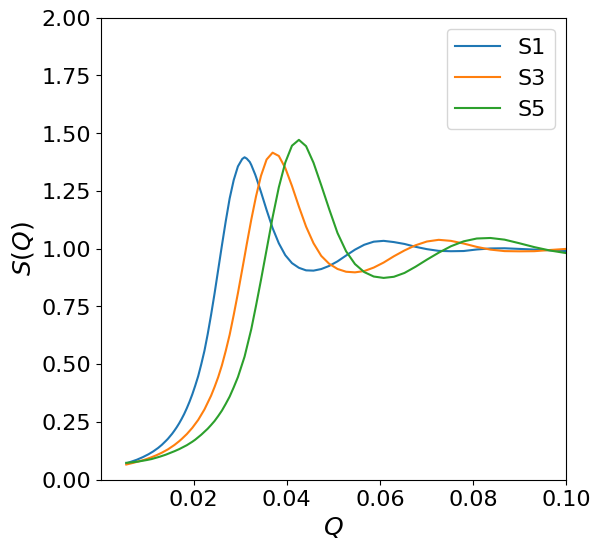

In [5]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
c_cycle = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
           'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

r = np.linspace(100, 300, 101)

for i in range(3):
    loaded_data = loadmat(filepath+filename_mat[i])
    SQ = loaded_data['SQ'][0]
    Q = loaded_data['Q'][0]

    ax.plot(Q,SQ,color=c_cycle[i],label=filename_mat[i].replace(".mat", ""))

ax.set_ylim(0,2)
ax.set_xlim(1e-4,1e-1)
ax.set_xlabel('$Q$',fontsize=18)
ax.set_ylabel('$S(Q)$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=16)
plt.show()